#cargamos el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_zebra = "/content/drive/MyDrive/aug/zebra/"
ruta_nozebra ="/content/drive/MyDrive/aug/nozebra/"

ruta_Augzebra = "/content/drive/MyDrive/aug/positivos/"
ruta_Augnozebra ="/content/drive/MyDrive/aug/negativo3/"

# Tratamiento del data set

## Lineas de zebra

1718 imagenes donde existe lineas de zebra

In [ ]:
crosswalk_training=[]
sizeW = 320
sizeH = 180

for img in os.listdir(ruta_zebra):
  img = cv2.imread(os.path.join(ruta_zebra,img))/255.0
  crosswalk_training.append(img)

In [ ]:
crosswalk_training[1].shape

(180, 320, 3)

In [ ]:
for img in os.listdir(ruta_Augzebra):
  img = cv2.imread(os.path.join(ruta_Augzebra,img))/255.0
  crosswalk_training.append(img)

In [ ]:
# Etiquetas para imagenes donde existen lineas de zebra (1)
etiquetas_zebra = np.repeat(1,len(crosswalk_training))
print(len(etiquetas_zebra))
print(etiquetas_zebra)

1718
[1 1 1 ... 1 1 1]


## no hay lineas de zebra

1664 imagenes donde no existe el paso peatonal

In [ ]:
nozebra_training=[]
for img in os.listdir(ruta_nozebra):
  img = cv2.imread(os.path.join(ruta_nozebra,img))/255.0
  nozebra_training.append(img)

In [ ]:
for img in os.listdir(ruta_Augnozebra):
  img = cv2.imread(os.path.join(ruta_Augnozebra,img))/255.0
  nozebra_training.append(img)

In [ ]:
len(nozebra_training)

1664

In [ ]:
# Etiquetas para imagenes donde no existen lineas de zebra(0)
etiquetas_nozebra = np.repeat(0,len(nozebra_training))
print(len(etiquetas_nozebra))
print(etiquetas_nozebra)

1664
[0 0 0 ... 0 0 0]


## Concatenacion de los datasets

In [ ]:
#Concatenacion del dataset
crosswalk_training += nozebra_training

In [ ]:
len(crosswalk_training)

3382

In [ ]:
crosswalk_training = np.array(crosswalk_training)


In [ ]:
print(len(crosswalk_training))

3382


In [ ]:
crosswalk_training = crosswalk_training.astype('float32')
print(len(crosswalk_training))


3382


In [ ]:
crosswalk_training.shape

(3382, 180, 320, 3)

In [ ]:
nro_imagen=1719
img = crosswalk_training[nro_imagen]
print(img.shape)
img = (np.expand_dims(img,0))
print (img.shape)

(180, 320, 3)
(1, 180, 320, 3)


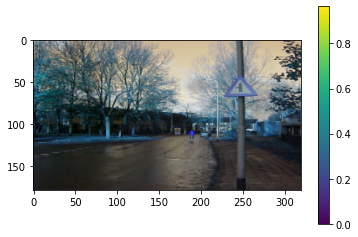

In [ ]:
plt.figure()
plt.imshow(crosswalk_training[nro_imagen])
plt.colorbar()
plt.grid(False)
plt.show();

# Targets

In [ ]:
class_names=['','Pazo Peatonal']

In [ ]:
# Concatenacion de las etiquetas
labels = np.concatenate([etiquetas_zebra, etiquetas_nozebra])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(labels.shape)

3382
[1 1 1 ... 0 0 0]
(3382,)


# Separacion de de datos 

In [ ]:
from sklearn.model_selection import train_test_split
from numpy.random import seed


In [ ]:
from sklearn.utils import check_random_state

random_state = check_random_state(42)
permutation = random_state.permutation(crosswalk_training.shape[0])

In [ ]:
crosswalk_training = crosswalk_training[permutation]
labels = labels[permutation]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(crosswalk_training, labels, test_size=0.20, random_state=42)


print( X_train.shape,"\n", X_test.shape,"\n", y_train.shape,"\n", y_test.shape)

(2705, 180, 320, 3) 
 (677, 180, 320, 3) 
 (2705,) 
 (677,)


In [ ]:
y_test[0]

0

In [ ]:
X_test[0]

array([[[0.73333335, 0.65882355, 0.45882353],
        [0.7372549 , 0.6627451 , 0.4627451 ],
        [0.72156864, 0.64705884, 0.44705883],
        ...,
        [0.87058824, 0.89411765, 0.77254903],
        [0.8784314 , 0.9019608 , 0.78039217],
        [0.8784314 , 0.9019608 , 0.78039217]],

       [[0.6313726 , 0.5529412 , 0.36862746],
        [0.63529414, 0.5568628 , 0.37254903],
        [0.62352943, 0.54509807, 0.36078432],
        ...,
        [0.8862745 , 0.9098039 , 0.7882353 ],
        [0.89411765, 0.9137255 , 0.7921569 ],
        [0.8862745 , 0.9098039 , 0.7882353 ]],

       [[0.5686275 , 0.48235294, 0.32156864],
        [0.47843137, 0.39215687, 0.23137255],
        [0.40784314, 0.32941177, 0.16862746],
        ...,
        [0.8862745 , 0.9019608 , 0.7882353 ],
        [0.89411765, 0.9019608 , 0.7882353 ],
        [0.8784314 , 0.89411765, 0.78039217]],

       ...,

       [[0.8392157 , 0.827451  , 0.6509804 ],
        [0.8509804 , 0.8392157 , 0.6627451 ],
        [0.8352941 , 0

In [ ]:
y_train[0]

1

In [ ]:
X_train[0]

array([[[0.84705883, 0.91764706, 0.79607844],
        [0.84313726, 0.9137255 , 0.7921569 ],
        [0.8509804 , 0.92156863, 0.80784315],
        ...,
        [0.87058824, 0.84705883, 0.67058825],
        [0.89411765, 0.8745098 , 0.69803923],
        [0.9019608 , 0.88235295, 0.7058824 ]],

       [[0.8509804 , 0.92941177, 0.8156863 ],
        [0.84313726, 0.92156863, 0.80784315],
        [0.84705883, 0.9254902 , 0.8117647 ],
        ...,
        [0.85882354, 0.8352941 , 0.65882355],
        [0.8862745 , 0.8666667 , 0.6901961 ],
        [0.88235295, 0.8627451 , 0.6862745 ]],

       [[0.85490197, 0.9411765 , 0.83137256],
        [0.85490197, 0.9411765 , 0.83137256],
        [0.8666667 , 0.9529412 , 0.84313726],
        ...,
        [0.9137255 , 0.8901961 , 0.7137255 ],
        [0.9137255 , 0.89411765, 0.7176471 ],
        [0.85490197, 0.8352941 , 0.65882355]],

       ...,

       [[0.81960785, 0.8039216 , 0.6156863 ],
        [0.80784315, 0.7921569 , 0.6039216 ],
        [0.80784315, 0

# Modelo de la red de Convolucion y la red Neuronal

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(sizeH,sizeW,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 318, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 159, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 157, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 78, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 48640)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='binary_crossentropy',
   metrics = ['acc']
   )


In [ ]:
history = model.fit(X_train,y_train,epochs=12,
                    validation_data=(X_test,y_test),
                    batch_size=16)

Epoch 1/12
170/170 [==============================] - 7s 28ms/step - loss: 0.5591 - acc: 0.6987 - val_loss: 0.3274 - val_acc: 0.7962
Epoch 2/12
170/170 [==============================] - 4s 24ms/step - loss: 0.2636 - acc: 0.8815 - val_loss: 0.1708 - val_acc: 0.9468
Epoch 3/12
170/170 [==============================] - 4s 24ms/step - loss: 0.1523 - acc: 0.9417 - val_loss: 0.1227 - val_acc: 0.9586
Epoch 4/12
170/170 [==============================] - 4s 23ms/step - loss: 0.1139 - acc: 0.9544 - val_loss: 0.0996 - val_acc: 0.9601
Epoch 5/12
170/170 [==============================] - 4s 24ms/step - loss: 0.1014 - acc: 0.9666 - val_loss: 0.0675 - val_acc: 0.9749
Epoch 6/12
170/170 [==============================] - 4s 23ms/step - loss: 0.0822 - acc: 0.9675 - val_loss: 0.1544 - val_acc: 0.9321
Epoch 7/12
170/170 [==============================] - 4s 24ms/step - loss: 0.0695 - acc: 0.9744 - val_loss: 0.0640 - val_acc: 0.9808
Epoch 8/12
170/170 [==============================] - 4s 24ms/step - 

#Modelo de la Red

22/22 - 0s - loss: 0.0425 - acc: 0.9852


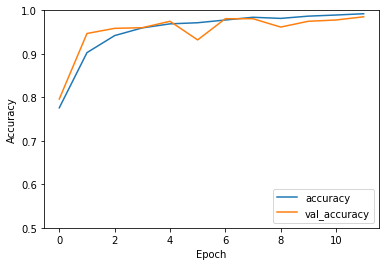

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

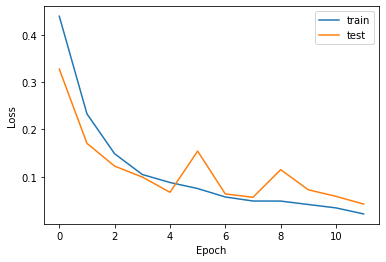

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Prueba de imagenes del dataset

In [ ]:
#escogemos la imagen 
nro_imagen=812
img = crosswalk_training[nro_imagen]
print(img.shape)
img = (np.expand_dims(img,0))
print (img.shape)

(180, 320, 3)
(1, 180, 320, 3)


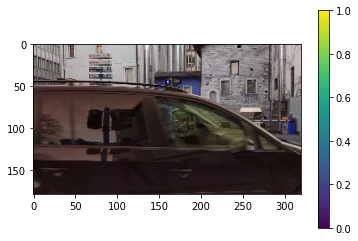

In [ ]:
#mostramos la imagen
plt.figure()
plt.imshow(crosswalk_training[nro_imagen])
plt.colorbar()
plt.grid(False)
plt.show();

In [ ]:
#Realizamos la prediccion de la imagen
predictions_single = model.predict(img)
print(predictions_single)

print(np.max(predictions_single))
print(np.argmax(predictions_single))
if np.max(predictions_single) < 0.1:
   print( "IT IS NOT A CROSSWALK")
else:
   print(" IT IS  A CROSSWALK")

[[1.7825314e-13]]
1.7825314e-13
0
IT IS NOT A CROSSWALK
